## Load MNIST on Python 3.x

In [1]:
import pickle
import gzip
from sklearn.metrics import confusion_matrix
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier 
from sklearn import metrics
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
import seaborn as sn
from PIL import Image
import os
import numpy as np

In [2]:
filename = 'C:/Users/virinchi/Desktop/ml_project_3/mnist.pkl.gz'
f = gzip.open(filename, 'rb')
training_data, validation_data, test_data = pickle.load(f, encoding='latin1')
f.close()

## Load USPS on Python 3.x

In [4]:
USPSMat  = []
USPSTar  = []
curPath  = 'C:/Users/virinchi/Desktop/ml_project_3/USPSdata/Numerals'
savedImg = []

for j in range(0,10):
    curFolderPath = curPath + '/' + str(j)
    imgs =  os.listdir(curFolderPath)
    for img in imgs:
        curImg = curFolderPath + '/' + img
        if curImg[-3:] == 'png':
            img = Image.open(curImg,'r')
            img = img.resize((28, 28))
            savedImg = img
            imgdata = (255-np.array(img.getdata()))/255
            USPSMat.append(imgdata)
            USPSTar.append(j)
USPSMat = np.asarray(USPSMat)
USPSTar = np.asarray(USPSTar)

In [5]:
FEATURE_SIZE = 785
NUM_CLASS = 10
LAMBDA = 0.01

In [6]:
def format_labels(labels):
    NUM_CLASS = 10
    result = np.zeros((labels.size,NUM_CLASS))
    result[np.arange(result.shape[0]), labels] = 1
    return result
def softmax(prediction):
    exp_vec = np.exp(prediction)
    res_exp_vec = np.zeros((prediction.shape[0],prediction.shape[1]))
    for i in range(prediction.shape[0]):
        res_exp_vec[i,:] = exp_vec[i,:]/np.sum(exp_vec[i,:])
    return res_exp_vec
def get_error(prediction, label, input_data):
    label = label.reshape(prediction.shape)
    s = np.matmul(input_data.T, prediction-label)
    return s;

In [7]:
def train_logistic_regression():
    total_iterations = 100
    i = 0
    learning_param = 0.9
    N = training_data[0].shape[0];
    weights = np.random.rand(FEATURE_SIZE, NUM_CLASS)
    labels = format_labels(training_data[1])
    train_input = training_data[0]
    train_input = np.insert(train_input, 0, 1, axis=1)

    param = learning_param/N;
    
    while i < total_iterations:
        # NxK
        prediction = np.matmul(train_input, weights)
        exp_vec = softmax(prediction)
        E_D = get_error(exp_vec, labels, train_input)
        reg_wt = LAMBDA * weights;
        reg_wt[0,:] = 0;
        weights = weights - param * (E_D + reg_wt)
        i = i+1
    return weights

In [8]:
def test_logistic_regression(test_input, weights):
    return softmax(np.matmul(test_input, weights))


In [9]:
weights = train_logistic_regression()

# LOGISTIC REGRESSION ACCURACY

In [12]:
def get_accuracy(weights, input_data, output_labels):
    predicted1 = softmax(np.matmul(input_data, weights))
    predicted_output = np.argmax(predicted1, axis=1)
    corr = np.sum(np.equal(predicted_output,output_labels))
    c = corr/predicted1.shape[0]
    return c,predicted_output

In [16]:
test_data1 = np.insert(test_data[0], 0, 1, axis=1)
print(test_data1)
print("------------")
print(test_data[0])
test_logistic_regression(test_data1,weights)
x = get_accuracy(weights, test_data1, test_data[1])
print(x)


test_data2 = np.insert(USPSMat,0,1,axis=1)
y = get_accuracy(weights, test_data2, USPSTar)
print(y)


[[1. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 ...
 [1. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]]
------------
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
(0.8874, array([7, 2, 1, ..., 4, 5, 6], dtype=int64))
(0.2950647532376619, array([0, 4, 6, ..., 3, 3, 9], dtype=int64))


In [28]:
print(pre)

[[0. 0. 0. ... 1. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


# NEURAL NETWORKS

In [17]:
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout
from keras.callbacks import EarlyStopping, TensorBoard
import keras
import numpy as np

input_size = 784
drop_out = 0.2
first_dense_layer_nodes  = 150
#second_dense_layer_nodes = 1
third_dense_layer_nodes = 10


def get_model():
    model = Sequential()
    
    model.add(Dense(first_dense_layer_nodes, input_dim=784, activation='relu', use_bias=True, kernel_initializer='random_uniform', bias_initializer='zeros', kernel_regularizer=None, bias_regularizer=None, activity_regularizer=None, kernel_constraint=None, bias_constraint=None))
#    model.add(Dense(second_dense_layer_nodes, activation='softmax', use_bias=True, kernel_initializer='random_uniform', bias_initializer='zeros', kernel_regularizer=None, bias_regularizer=None, activity_regularizer=None, kernel_constraint=None, bias_constraint=None))
    model.add(Dense(third_dense_layer_nodes, activation='softmax', use_bias=True, kernel_initializer='random_uniform', bias_initializer='zeros', kernel_regularizer=None, bias_regularizer=None, activity_regularizer=None, kernel_constraint=None, bias_constraint=None))
    model.summary()
    sgd = keras.optimizers.SGD(lr=0.1, momentum=0.1, decay=0.0, nesterov=True)
    model.compile(optimizer=sgd,
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])
    
    return model
model = get_model()

C:\Users\virinchi\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 150)               117750    
_________________________________________________________________
dense_2 (Dense)              (None, 10)                1510      
Total params: 119,260
Trainable params: 119,260
Non-trainable params: 0
_________________________________________________________________


# RUN MODEL

In [70]:
validation_data_split = 0
num_epochs = 25
model_batch_size = 256
tb_batch_size = 32
early_patience = 5

tensorboard_cb   = TensorBoard(log_dir='logs', batch_size= tb_batch_size, write_graph= True)
earlystopping_cb = EarlyStopping(monitor='val_loss', verbose=1, patience=early_patience, mode='min')


processedData = training_data[0]
processedLabel = format_labels(training_data[1])


history = model.fit(processedData
                    , processedLabel
                    , validation_split=validation_data_split
                    , epochs=num_epochs
                    , batch_size=model_batch_size
                    , callbacks = [tensorboard_cb,earlystopping_cb]
                   )


Epoch 1/25
  512/50000 [..............................] - ETA: 22:15 - loss: 0.0232 - acc: 0.9941

C:\Users\virinchi\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.126660). Check your callbacks.
  % delta_t_median)


50000/50000 [==============================] - 29s 581us/step - loss: 0.0237 - acc: 0.9956
Epoch 2/25
 4096/50000 [=>............................] - ETA: 1s - loss: 0.0204 - acc: 0.9976

C:\Users\virinchi\Anaconda3\lib\site-packages\keras\callbacks.py:569: RuntimeWarning: Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss,acc
  (self.monitor, ','.join(list(logs.keys()))), RuntimeWarning


50000/50000 [==============================] - 2s 33us/step - loss: 0.0233 - acc: 0.9957
Epoch 3/25
50000/50000 [==============================] - 3s 55us/step - loss: 0.0228 - acc: 0.9959
Epoch 4/25
50000/50000 [==============================] - 2s 43us/step - loss: 0.0223 - acc: 0.9958
Epoch 5/25
50000/50000 [==============================] - 2s 42us/step - loss: 0.0218 - acc: 0.9963
Epoch 6/25
50000/50000 [==============================] - 2s 45us/step - loss: 0.0214 - acc: 0.9964
Epoch 7/25
50000/50000 [==============================] - 2s 41us/step - loss: 0.0210 - acc: 0.9963
Epoch 8/25
50000/50000 [==============================] - 2s 38us/step - loss: 0.0206 - acc: 0.9966
Epoch 9/25
50000/50000 [==============================] - 2s 38us/step - loss: 0.0203 - acc: 0.9967
Epoch 10/25
50000/50000 [==============================] - 2s 40us/step - loss: 0.0198 - acc: 0.9969: 0s - loss: 0.0197 - ac
Epoch 11/25
50000/50000 [==============================] - 2s 43us/step - loss: 0.0195

In [71]:
def get_accuracy(input_labels, output_labels):
    
    predict = model.predict(input_labels)
    predicted_output = np.argmax(predict, axis=1)
    corr = np.sum(np.equal(predicted_output,output_labels))
    return corr/predict.shape[0],predicted_output

accu,predicted = get_accuracy(test_data[0],test_data[1])
accu

0.978

In [72]:
predict = format_labels(predicted)
predict

array([[0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [73]:
get_accuracy(USPSMat,USPSTar)

(0.4664233211660583, array([0, 5, 5, ..., 9, 9, 7], dtype=int64))

# Random classifier

In [74]:
from sklearn.ensemble import RandomForestClassifier

In [26]:
x=test_data[0].tolist()
test = np.asarray(x)
test
x=training_data[0].tolist()
train = np.asarray(x)
training_data[1]

KeyboardInterrupt: 

Exception ignored in: 'zmq.backend.cython.message.Frame.__dealloc__'
Traceback (most recent call last):
  File "zmq/backend/cython/checkrc.pxd", line 12, in zmq.backend.cython.checkrc._check_rc
    PyErr_CheckSignals()
KeyboardInterrupt


array([5, 0, 4, ..., 8, 4, 8], dtype=int64)

In [96]:
rf = RandomForestClassifier(n_estimators=100)
rf.fit(training_data[0],training_data[1])

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [97]:
pred = rf.predict(test_data[0])

In [98]:
count =0
for i in range(len(pred)):
    if pred[i]==test_data[1][i]:
        count = count +1
count    

acc= count/len(pred)
acc

0.9683

# svm classifier

In [11]:
classifier1 = SVC(kernel='rbf', C=2, gamma = 0.05);
classifier1.fit(training_data[0],training_data[1])
y_preds=classifier1.predict(test_data[0])
print(y_preds)
#y_preds = np.argmax(y_preds, axis=1)
svmaccu = metrics.accuracy_score(test_data[1], y_preds)
print("Accuracy:",svmaccu)


[7 2 1 ... 4 5 6]
Accuracy: 0.9827


In [36]:
y_preds1 = format_labels(y_preds)
print(y_preds1)


[[0. 0. 0. ... 1. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


# Ensembling majority voting

In [38]:

zipped = []
for i in range(len(predict)):
    zipped.append(predict[i]+pre[i]+y_pred[i]+y_preds1[i]/4)
zipped = np.asarray(zipped)
zipped = np.argmax(zipped, axis=1)
ensemblingaccu = metrics.accuracy_score(test_data[1], zipped)
print("Accuracy:",ensemblingaccu)
    

Accuracy: 0.9714


# confusion matrix

In [92]:
def confusion_matrix1(predicted,test_data):
    #accu1= [0.00 for i in range(10)]
    array = confusion_matrix(predicted,test_data ,labels=[0,1,2,3,4,5,6,7,8,9])
    #total1 = np.sum(array,axis=1)
    for i in range(10):
        c = array[i][i]/total1[i]
        accu1[i] = c
        array = array.tolist()
        array[i].append(accu1[i])
        array = np.asarray(array)    
    df_cm = pd.DataFrame(array, index = [i for i in range(10)],
                columns = [0,1,2,3,4,5,6,7,8,9,'Accuracy'])    
    plt.figure(figsize = (20,20))
    sn.set(font_scale=2)
    sn.heatmap(df_cm, annot=True,cmap="YlGnBu",fmt='g')
    return


# confusion matrix for neural networks

[[ 972    0    4    0    2    4    4    1    6    3]
 [   0 1124    2    0    0    0    3    4    0    2]
 [   1    2 1004    5    1    0    2    7    3    0]
 [   1    2    5  989    1   12    1    3    9    6]
 [   1    0    2    1  959    0    3    0    2    6]
 [   0    1    0    2    0  860    3    0    3    1]
 [   1    2    2    0    3    8  940    0    2    1]
 [   1    1    3    3    2    1    0 1006    5    4]
 [   2    3   10    4    0    4    2    1  940    0]
 [   1    0    0    6   14    3    0    6    4  986]]


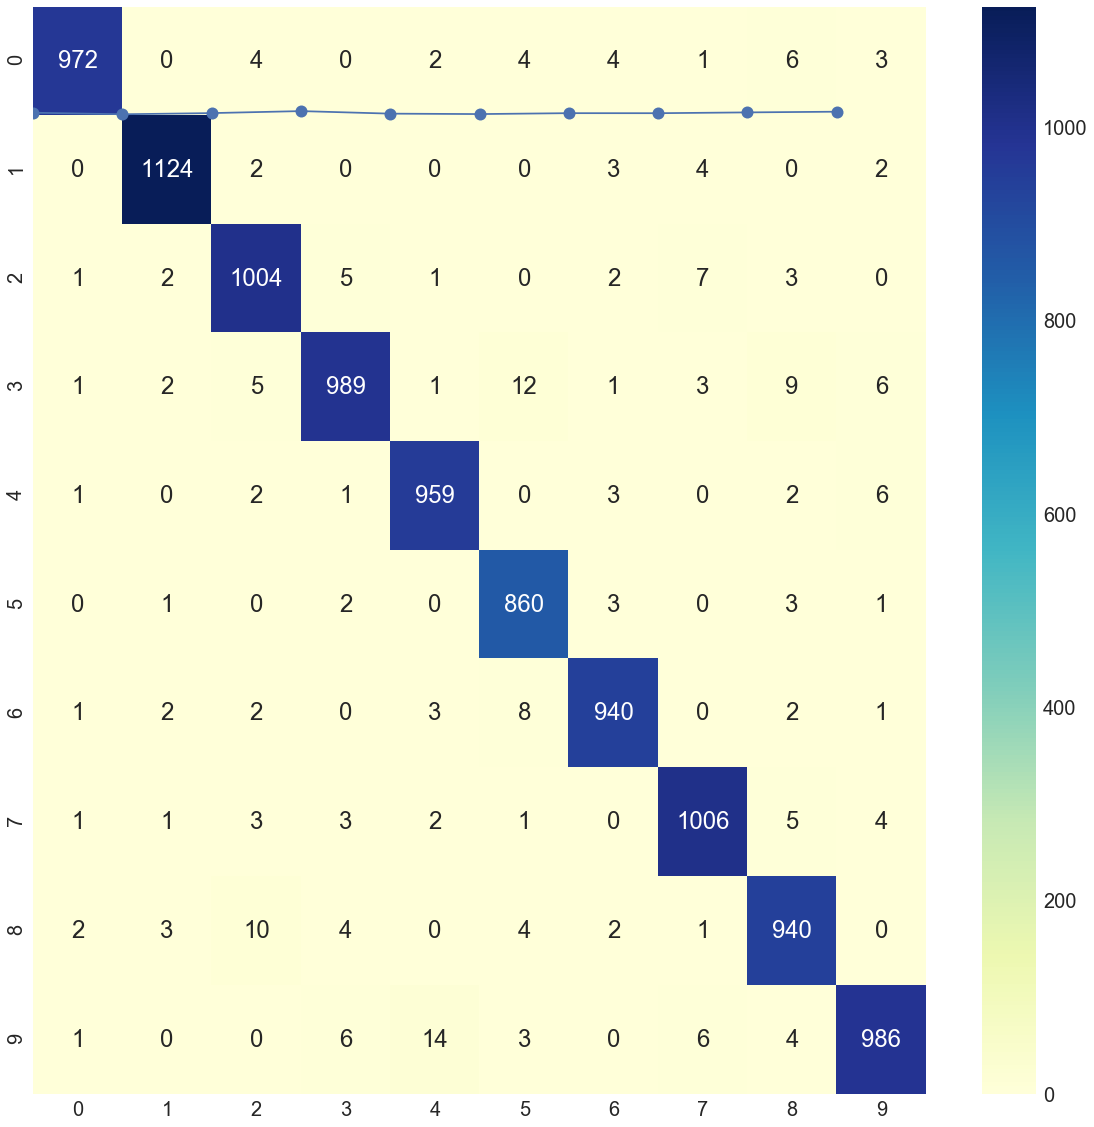

In [102]:
from sklearn.metrics import confusion_matrix

array=confusion_matrix(predicted, test_data[1],labels=[0,1,2,3,4,5,6,7,8,9])
df_cm = pd.DataFrame(array, index = [0,1,2,3,4,5,6,7,8,9],columns = [0,1,2,3,4,5,6,7,8,9])
print(array)
plt.figure(figsize = (20,20))
sn.set(font_scale=2)
sn.heatmap(df_cm, annot=True,cmap="YlGnBu",fmt='g')

cwise =[]
for i in range(len(array)):
    cwise.append(array[i][i]/sum(array[i]))

plt.plot(cwise,marker="o",markersize=12)    
plt.show()


# confusion matrix for logistic regression

confusion matrix for logistic regression with total accuracy: 0.8857


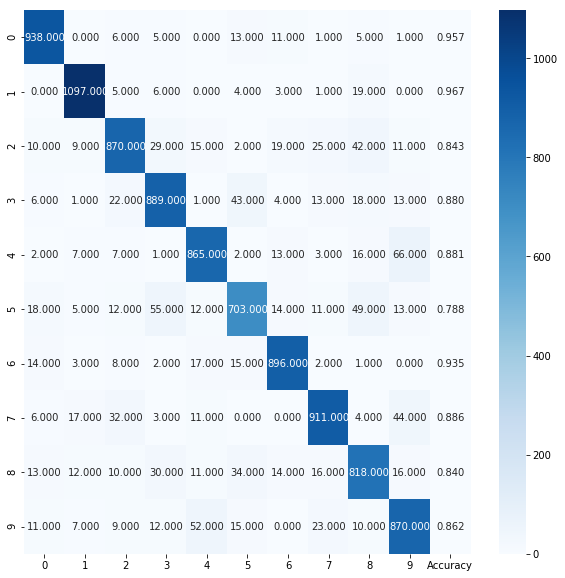

In [15]:
print('confusion matrix for logistic regression with total accuracy:',x)
confusion_matrix1(pre,test_data[1])

# confusion matrix for random forest

[[ 967    0    6    0    0    2    8    1    5    8]
 [   1 1120    0    0    1    0    3    2    0    6]
 [   1    2 1003    9    2    1    0   18    4    2]
 [   0    5    5  973    0   15    0    4    7   12]
 [   0    1    2    0  954    4    3    3    8   11]
 [   2    1    0    8    0  857    3    0    5    5]
 [   5    3    3    0    5    5  940    0    3    1]
 [   1    0    8    9    0    3    0  987    4    4]
 [   3    3    5    7    2    3    1    3  927    5]
 [   0    0    0    4   18    2    0   10   11  955]]


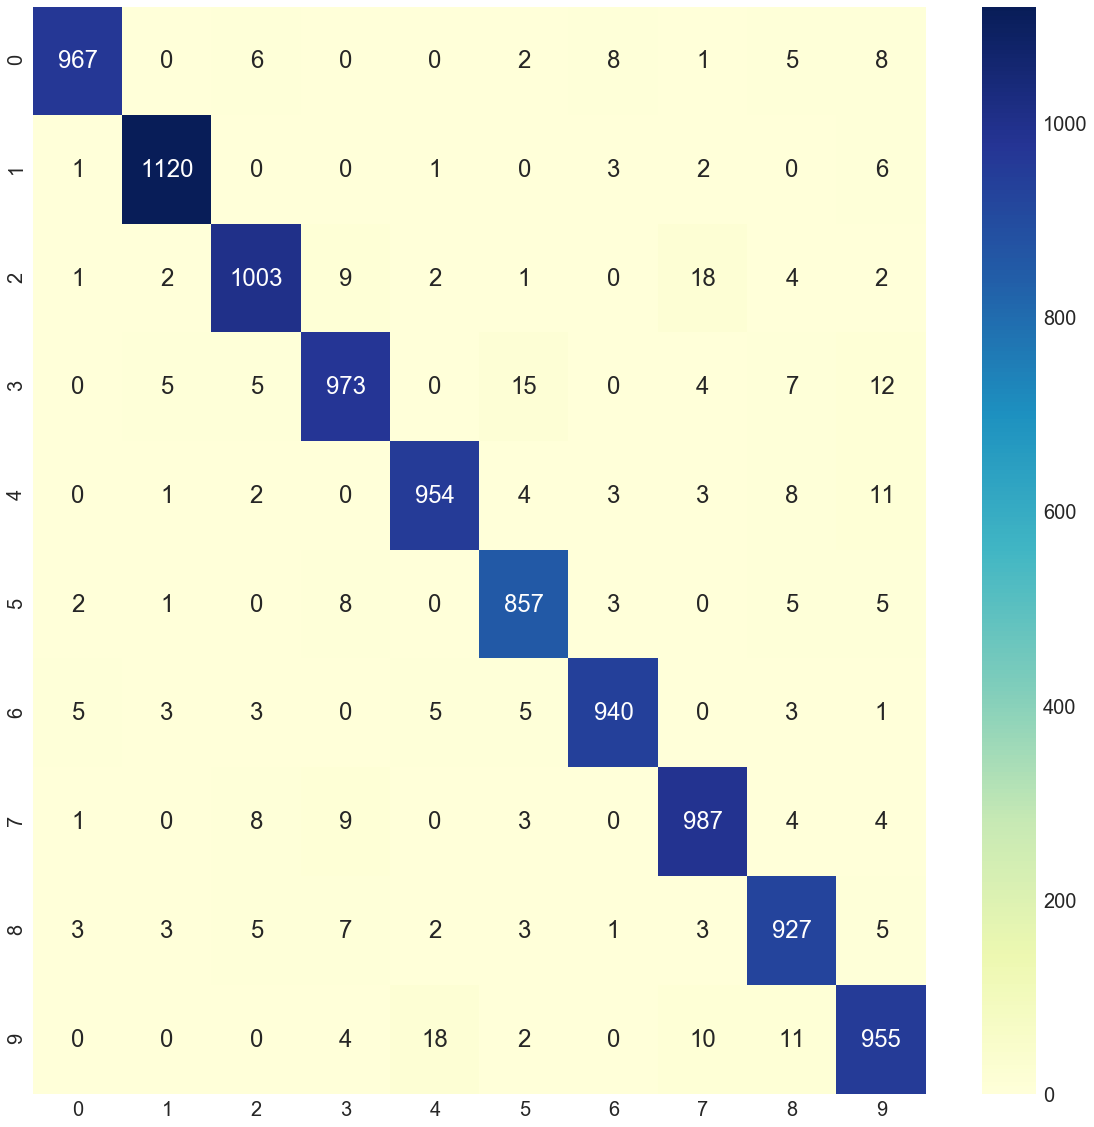

In [104]:
array=confusion_matrix(pred, test_data[1],labels=[0,1,2,3,4,5,6,7,8,9])
df_cm = pd.DataFrame(array, index = [0,1,2,3,4,5,6,7,8,9],columns = [0,1,2,3,4,5,6,7,8,9])
print(array)
plt.figure(figsize = (20,20))
sn.set(font_scale=2)
sn.heatmap(df_cm, annot=True,cmap="YlGnBu",fmt='g')



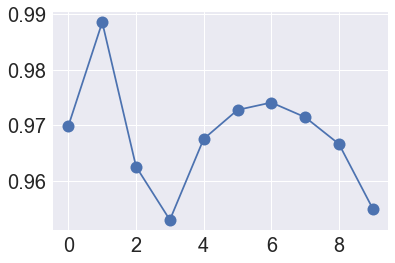

In [105]:
cwise =[]
for i in range(len(array)):
    cwise.append(array[i][i]/sum(array[i]))

plt.plot(cwise,marker="o",markersize=12)    
plt.show()


# confusion matrix for majority voting

confusion matrix for random forest  with total accuracy: 0.9714


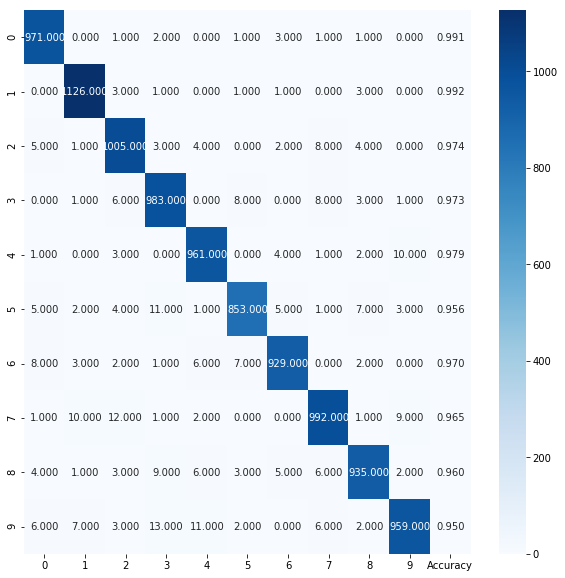

In [31]:
print('confusion matrix for random forest  with total accuracy:',ensemblingaccu)
confusion_matrix1(zipped,test_data[1])

# confusion matrix for svm

confusion matrix for svm  with total accuracy: 0.9827


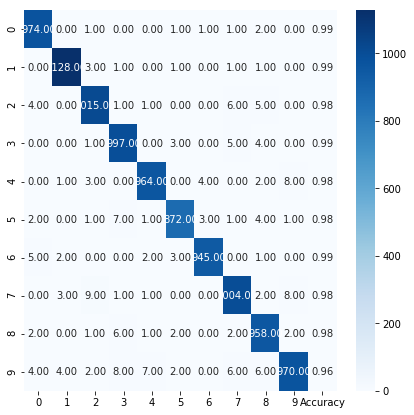

In [41]:
print('confusion matrix for svm  with total accuracy:',svmaccu)
confusion_matrix1(y_preds,test_data[1])